- https://www.kaggle.com/kralmachine/data-analysis-visualization-for-beginners

# 데이터 불러오기

In [1]:
import pandas as pd
data = pd.read_csv('Loan_payments_data.csv')

- Loan_id :A unique loan number assigned to each loan customers
- Loan_status: Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts
- Principal: Basic principal loan amount at the origination #대출원금
- terms: Can be weekly (7 days), biweekly, and monthly payoff schedule
- Effective_date : When the loan got originated and took effects # 대출 시작 및 효력날짜?
- Due_date: Since it’s one-time payoff schedule, each loan has one single due date #상환만기날짜
- Paidoff_time: The actual time a customer pays off the loan#갚은날짜
- Pastdue_days: How many days a loan has been past due #오버된 날짜 
- Age,education,gender: customer’s basic demographic information

#Loan Collection : 대출회수

In [2]:
data


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')


# EDA

## 데이터확인

In [4]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [5]:
data.tail()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [6]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [7]:
# data describe
data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [8]:
#data age describe
data.age.describe()

count    500.000000
mean      31.116000
std        6.084784
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

In [9]:
# age and terms describe

print(data[['age','terms']].describe())

              age       terms
count  500.000000  500.000000
mean    31.116000   22.824000
std      6.084784    8.000064
min     18.000000    7.000000
25%     27.000000   15.000000
50%     30.000000   30.000000
75%     35.000000   30.000000
max     51.000000   30.000000


In [10]:
#data shape
data.shape

(500, 11)

### 상관계수

In [11]:
# data corr  # int값만 가능 
data.corr()

,Principal,terms,past_due_days,age
Principal,1.000000,0.534302,-0.093139,-0.092613
terms,0.534302,1.000000,-0.102613,-0.074259
past_due_days,-0.093139,-0.102613,1.000000,-0.053849
age,-0.092613,-0.074259,-0.053849,1.000000


In [12]:
# age terms  corr

data[['age','terms']].corr()

,age,terms
age,1.000000,-0.074259
terms,-0.074259,1.000000


In [13]:
# data dtypes

data.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

In [14]:
# data size
# row x column
data.size

5500

In [15]:
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [16]:
# data columns

for col in data.columns:
    print(col)

Loan_ID
loan_status
Principal
terms
effective_date
due_date
paid_off_time
past_due_days
age
education
Gender


In [2]:
# rename

data = data.rename(columns={'Loan_ID':'loan_id',
                           'Principal':'principal',
                           'Gender':'gender'})

for col in data.columns:
    print(col)

loan_id
loan_status
principal
terms
effective_date
due_date
paid_off_time
past_due_days
age
education
gender


### column별 상태확인

In [18]:
# loan status

data['loan_status'].value_counts(dropna=False)

#paid off 갚은애들
#collection_paid off 지났지만 갚은애들
#collection 아직 안갚은애들  => PAID_off_TIME 이 NAN 값 

PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: loan_status, dtype: int64

In [19]:
data[data['loan_status'] =='COLLECTION_PAIDOFF']

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
400,xqd20160401,COLLECTION_PAIDOFF,1000,30,9/9/2016,10/8/2016,10/10/2016 11:45,2.0,26,college,male
401,xqd20160402,COLLECTION_PAIDOFF,1000,15,9/9/2016,9/23/2016,9/27/2016 17:00,4.0,28,college,male
402,xqd20320403,COLLECTION_PAIDOFF,1000,30,9/9/2016,11/7/2016,11/20/2016 14:10,13.0,39,college,male
403,xqd20160404,COLLECTION_PAIDOFF,1000,15,9/9/2016,9/23/2016,9/28/2016 15:38,5.0,29,Bechalor,male
404,xqd20190405,COLLECTION_PAIDOFF,800,15,9/9/2016,9/23/2016,9/26/2016 17:22,3.0,33,High School or Below,male
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [20]:
data[data['loan_status'] =='COLLECTION']

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
300,xqd20160301,COLLECTION,1000,15,9/9/2016,9/23/2016,NaN,76.0,29,college,male
301,xqd20160302,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,37,High School or Below,male
302,xqd20160303,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,33,High School or Below,male
303,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male
304,xqd20160305,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,24,Bechalor,male
...,...,...,...,...,...,...,...,...,...,...,...
395,xqd20160396,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,25,High School or Below,male
396,xqd20160397,COLLECTION,1000,30,9/12/2016,10/11/2016,NaN,58.0,33,High School or Below,male
397,xqd20160398,COLLECTION,800,15,9/12/2016,9/26/2016,NaN,73.0,39,college,male
398,xqd20160399,COLLECTION,1000,30,9/12/2016,11/10/2016,NaN,28.0,28,college,male


In [21]:
#loan status unique value

print(data.loan_status.unique())

loan_status_unique = data.loan_status.unique().reshape(-1,1)
print(loan_status_unique)

['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']
[['PAIDOFF']
 ['COLLECTION']
 ['COLLECTION_PAIDOFF']]


In [22]:
# loan status with loan_id counts

paidoff_count =0
collection_count =0
collection_paidoff_count=0

# loan status가 paid off 인 것의 길이
paidoff_count = len(data[data.loan_status == loan_status_unique[0][0]].loan_id)

#loan status가 collection 인 것의 길이
collection_count = len(data[data.loan_status == loan_status_unique[1][0]].loan_id)

#laon status 가 collection_paidoff 인것의 길이
collection_paidoff_count = len(data[data.loan_status == loan_status_unique[2][0]].loan_id)

In [23]:
print(paidoff_count)
print(collection_count)
print(collection_paidoff_count)

300
100
100


In [24]:
# 대출 금액별 카운트

print(data.principal.value_counts())

1000    377
800     111
300       6
500       3
900       2
700       1
Name: principal, dtype: int64


### groupby 

In [25]:
#금액별 loan status

print(data.principal.isnull().sum())

print(data.groupby('loan_status')['principal'].value_counts())

0
loan_status         principal
COLLECTION          1000          77
                    800           23
COLLECTION_PAIDOFF  1000          80
                    800           19
                    500            1
PAIDOFF             1000         220
                    800           69
                    300            6
                    500            2
                    900            2
                    700            1
Name: principal, dtype: int64


In [26]:
# loan status별 금액 합계

print(data.groupby('loan_status')['principal'].sum())

loan_status
COLLECTION             95400
COLLECTION_PAIDOFF     95700
PAIDOFF               280500
Name: principal, dtype: int64


In [27]:
#terms

print(data.terms.isnull().sum())
print(data.terms.value_counts())


0
30    272
15    207
7      21
Name: terms, dtype: int64


In [28]:
# terms 에 따른 금액

print(data.groupby('terms')['principal'].value_counts())
print(data.groupby('terms')['principal'].sum())

terms  principal
7      1000          11
       300            6
       800            2
       500            1
       900            1
15     800          103
       1000         100
       500            2
       700            1
       900            1
30     1000         266
       800            6
Name: principal, dtype: int64
terms
7      15800
15    185000
30    270800
Name: principal, dtype: int64


### effective state

In [29]:
data

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [30]:
### effective state

print(data.effective_date.isnull().sum())

print(data['effective_date'].value_counts())

0
9/11/2016    231
9/12/2016    148
9/10/2016     46
9/14/2016     33
9/13/2016     23
9/9/2016      15
9/8/2016       4
Name: effective_date, dtype: int64


In [31]:
# 대출일 별 기간 및 금액 

#카운트
print(data.groupby('effective_date')[['terms','principal']].count())
#합계
print(data.groupby('effective_date')[['terms','principal']].sum())
#평균
print(data.groupby('effective_date')[['terms','principal']].mean())

                terms  principal
effective_date                  
9/10/2016          46         46
9/11/2016         231        231
9/12/2016         148        148
9/13/2016          23         23
9/14/2016          33         33
9/8/2016            4          4
9/9/2016           15         15
                terms  principal
effective_date                  
9/10/2016        1026      43200
9/11/2016        5328     219000
9/12/2016        3335     139400
9/13/2016         441      20900
9/14/2016         840      31400
9/8/2016          105       4000
9/9/2016          337      13700
                    terms    principal
effective_date                        
9/10/2016       22.304348   939.130435
9/11/2016       23.064935   948.051948
9/12/2016       22.533784   941.891892
9/13/2016       19.173913   908.695652
9/14/2016       25.454545   951.515152
9/8/2016        26.250000  1000.000000
9/9/2016        22.466667   913.333333


### age

In [32]:
print(data.age.isnull().sum())
print(data.groupby("age")[['terms','principal']].sum())


0
     terms  principal
age                  
18      30       1000
19      60       2000
20     105       4000
21     195       6800
22     172       7300
23     202       8000
24     525      22200
25     404      19400
26    1079      44100
27     899      36600
28     780      30500
29     898      39000
30     900      36200
31     494      21200
32     457      19400
33     735      27700
34     554      24200
35     546      23000
36     330      13200
37     442      17400
38     450      18000
39     195       9000
40     195       7600
41     105       4600
42      90       3600
43     105       4400
44      90       3600
45     120       5000
46      90       4200
47      45       2800
49      30       1000
50      75       3800
51      15        800


In [33]:
data_age = data.age.value_counts().index
data_age
len(data_age)

data_age_list=[]
for age in data_age:
    data_age_list.append(sum(data[data.age == int(age)].principal))
    

In [34]:
data_age_list

[44100,
 39000,
 36600,
 36200,
 30500,
 27700,
 23000,
 24200,
 22200,
 21200,
 19400,
 19400,
 18000,
 17400,
 13200,
 9000,
 8000,
 7600,
 7300,
 6800,
 5000,
 4200,
 4600,
 4400,
 3600,
 3800,
 4000,
 3600,
 2800,
 2000,
 800,
 1000,
 1000]

### education

In [35]:

data

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [36]:
#education state
print(data.education.unique())
print(data.education.value_counts())
print(data.groupby('education')['gender'].value_counts())

['High School or Below' 'Bechalor' 'college' 'Master or Above']
college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: education, dtype: int64
education             gender
Bechalor              male       54
                      female     13
High School or Below  male      178
                      female     31
Master or Above       male        4
college               male      187
                      female     33
Name: gender, dtype: int64


In [38]:
print(data.groupby('education')['loan_status'].value_counts())
print(data.groupby(['education','gender'])['principal'].sum())

education             loan_status       
Bechalor              PAIDOFF                41
                      COLLECTION_PAIDOFF     15
                      COLLECTION             11
High School or Below  PAIDOFF               123
                      COLLECTION             49
                      COLLECTION_PAIDOFF     37
Master or Above       PAIDOFF                 3
                      COLLECTION              1
college               PAIDOFF               133
                      COLLECTION_PAIDOFF     48
                      COLLECTION             39
Name: loan_status, dtype: int64
education             gender
Bechalor              female     12400
                      male       50900
High School or Below  female     29400
                      male      169400
Master or Above       male        2400
college               female     31000
                      male      176100
Name: principal, dtype: int64


### due_date

In [39]:
data

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [50]:
#due data 
print('<유니크>')
print(data.due_date.unique())
print('<null값 합계>')
print(data.due_date.isnull().sum())
print('<갯수>')
print(data.due_date.value_counts())
print('due_date별 금액합계')
print(data.groupby('due_date')['principal'].sum())

<유니크>
['10/7/2016' '9/22/2016' '10/8/2016' '9/15/2016' '9/24/2016' '9/16/2016'
 '10/9/2016' '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016'
 '9/18/2016' '9/26/2016' '10/26/2016' '10/11/2016' '11/10/2016'
 '9/19/2016' '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016'
 '11/12/2016' '9/23/2016' '11/7/2016']
<null값 합계>
0
<갯수>
10/10/2016    123
9/25/2016      87
10/11/2016     69
9/26/2016      60
10/9/2016      28
10/13/2016     21
9/24/2016      17
9/27/2016      12
9/28/2016      10
11/10/2016     10
11/9/2016       9
10/12/2016      8
10/8/2016       7
9/17/2016       7
9/23/2016       6
10/26/2016      4
10/25/2016      4
9/18/2016       4
10/7/2016       3
9/19/2016       3
9/16/2016       3
11/12/2016      2
9/22/2016       1
9/15/2016       1
11/7/2016       1
Name: due_date, dtype: int64
due_date별 금액합계
due_date
10/10/2016    122300
10/11/2016     68800
10/12/2016      7800
10/13/2016     20600
10/25/2016      4000
10/26/2016      3800
10/7/2016       3000
10/8/2016   

### paid_off

In [47]:
print(data.paid_off_time.unique())
print(data.paid_off_time.isnull().sum())
print(data.paid_off_time.value_counts())
print(data.groupby('paid_off_time')['principal'].sum())

['9/14/2016 19:31' '10/7/2016 9:00' '9/25/2016 16:58' '9/22/2016 20:00'
 '9/23/2016 21:36' '9/9/2016 13:45' '10/7/2016 23:07' '10/5/2016 20:33'
 '10/8/2016 16:00' '9/24/2016 13:00' '9/11/2016 19:11' '10/9/2016 16:00'
 '10/7/2016 23:32' '9/13/2016 21:57' '9/15/2016 14:27' '9/24/2016 16:00'
 '9/27/2016 14:21' '9/23/2016 18:49' '10/5/2016 22:05' '9/23/2016 7:42'
 '10/9/2016 9:00' '10/8/2016 17:09' '10/9/2016 23:00' '10/3/2016 12:50'
 '9/29/2016 12:18' '9/21/2016 20:16' '9/23/2016 8:21' '9/22/2016 19:17'
 '10/9/2016 17:33' '9/24/2016 14:41' '10/7/2016 21:48' '10/9/2016 17:44'
 '10/9/2016 7:24' '9/25/2016 21:49' '9/25/2016 9:00' '10/10/2016 16:00'
 '9/25/2016 13:00' '10/10/2016 11:33' '9/25/2016 14:36' '9/24/2016 9:00'
 '9/20/2016 15:00' '9/21/2016 22:29' '9/12/2016 22:17' '10/8/2016 14:14'
 '10/9/2016 8:53' '10/10/2016 9:00' '9/25/2016 19:21' '9/13/2016 4:34'
 '9/25/2016 16:00' '10/7/2016 2:33' '9/24/2016 11:40' '9/22/2016 6:38'
 '9/30/2016 21:12' '9/24/2016 13:42' '10/8/2016 7:25' '9/12/2

### past due days

In [57]:
print('#')
print(data.past_due_days.unique())
print('#')
print(data.past_due_days.isnull().sum())
print('#')
print(data.past_due_days.value_counts())
print('#')
print(data.groupby('past_due_days')['principal'].sum())
# print('#')
# print(data.groupby('past_due_days')['gender'].count())
print('#last')
print(data.groupby('gender')['past_due_days'].count())

print('#')
print(data.groupby('education')['past_due_days'].count())

#
[nan 76. 61. 75. 60. 59. 74. 29. 44. 58. 73. 28.  2.  4. 13.  5.  3. 12.
 27.  1. 25. 24. 36.  7. 14. 23.  6. 38. 19. 52. 51.  9. 56.  8.]
#
300
#
59.0    40
74.0    25
2.0     22
1.0     18
3.0     14
60.0    13
4.0      8
75.0     7
29.0     7
5.0      5
27.0     3
76.0     3
7.0      3
44.0     3
14.0     3
28.0     2
58.0     2
13.0     2
61.0     2
12.0     2
25.0     2
24.0     2
6.0      2
56.0     1
73.0     1
36.0     1
23.0     1
38.0     1
19.0     1
52.0     1
51.0     1
9.0      1
8.0      1
Name: past_due_days, dtype: int64
#
past_due_days
1.0     17100
2.0     20600
3.0     13200
4.0      7600
5.0      4800
6.0      2000
7.0      3000
8.0      1000
9.0      1000
12.0     1800
13.0     2000
14.0     3000
19.0     1000
23.0     1000
24.0     2000
25.0     2000
27.0     3000
28.0     2000
29.0     7000
36.0     1000
38.0     1000
44.0     3000
51.0      800
52.0     1000
56.0      800
58.0     2000
59.0    39800
60.0    12800
61.0     2000
73.0      800
74.0    22000
75.0

# Data Cleaning

## drop

In [59]:
#load id drop  cause it is just an index

data = data.drop('loan_id',axis=1)

In [62]:
print(data.isnull().sum())
print(len(data))

loan_status         0
principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
gender              0
dtype: int64
500


In [66]:
#결측치 제거

data.drop(['paid_off_time','past_due_days'],axis=1,inplace = True)

In [69]:
data.isnull().sum()

loan_status       0
principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
gender            0
dtype: int64

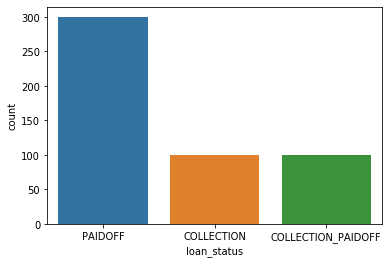

In [71]:
sns.countplot(data['loan_status'])
plt.show() #생략가능

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

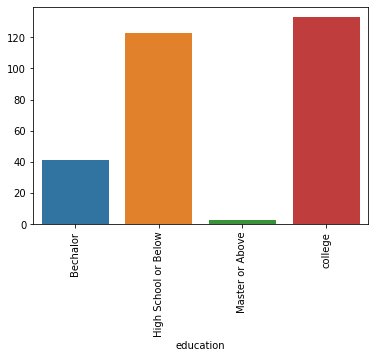

In [76]:
#paidoff 사람들 교육정도 
# x축에 인덱스 주고 y축에 value count!
sns.barplot(data[data['loan_status']=='PAIDOFF'].groupby('education')['gender'].count().index,
            y=data[data['loan_status']=='PAIDOFF'].groupby('education')['gender'].count().values)
plt.xticks(rotation=90)

## encoding

In [ ]:
# encoding 법

# https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221592651246&proxyReferer=https:%2F%2Fwww.google.com%2F

### loan status

In [77]:
# loan status 문자를 encoder를 통해서 숫자로 변경
# 머신러닝이나 딥러닝을 돌릴때에는 이과정이 필수 !
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['loan_status']=le.fit_transform(data['loan_status'])


In [79]:
data.loan_status.value_counts()

2    300
1    100
0    100
Name: loan_status, dtype: int64

### principal

In [81]:
data[data['principal']== 1000].gender.value_counts()

male      320
female     57
Name: gender, dtype: int64

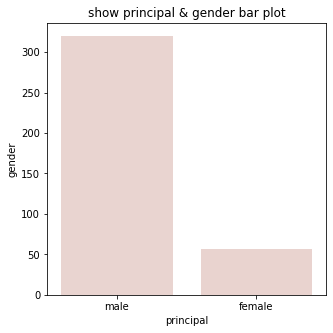

In [83]:
# 1000불을 빌린사람들의 남여비율
plt.figure(figsize=(5,5))
ax = sns.barplot(x = data[data['principal']==1000].gender.value_counts().index,
                y=data[data['principal']== 1000].gender.value_counts().values,
                palette = sns.cubehelix_palette(120))

plt.xlabel('principal')
plt.ylabel('gender')
plt.title('show principal & gender bar plot')
plt.show()

In [84]:
le = LabelEncoder()
data['principal'] = le.fit(data['principal'])

In [89]:
data


,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,2,LabelEncoder(),30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,LabelEncoder(),30,9/8/2016,10/7/2016,50,Bechalor,female
2,2,LabelEncoder(),30,9/8/2016,10/7/2016,33,Bechalor,female
3,2,LabelEncoder(),15,9/8/2016,9/22/2016,27,college,male
4,2,LabelEncoder(),30,9/9/2016,10/8/2016,28,college,female
...,...,...,...,...,...,...,...,...
495,1,LabelEncoder(),30,9/12/2016,10/11/2016,28,High School or Below,male
496,1,LabelEncoder(),15,9/12/2016,9/26/2016,26,High School or Below,male
497,1,LabelEncoder(),15,9/12/2016,9/26/2016,30,college,male
498,1,LabelEncoder(),30,9/12/2016,11/10/2016,38,college,female


In [86]:
data['terms']

0      30
1      30
2      30
3      15
4      30
       ..
495    30
496    15
497    15
498    30
499    30
Name: terms, Length: 500, dtype: int64

## terms

labels :  Int64Index([30, 15, 7], dtype='int64')
values :  [272 207  21]


Text(0.5, 1.0, 'terms according to analysis')

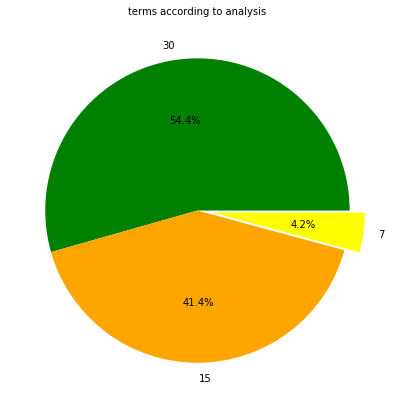

In [94]:
labels = data['terms'].value_counts().index
print("labels : ",labels)
colors = ['green','orange','yellow']

explode=[0,0,0.1]
values = data['terms'].value_counts().values
print("values : ",values)


# 시각화

plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors = colors,autopct='%1.1f%%')

plt.title('terms according to analysis',fontsize=10)

### terms and age

Text(0.5, 1, 'terms vs age values')

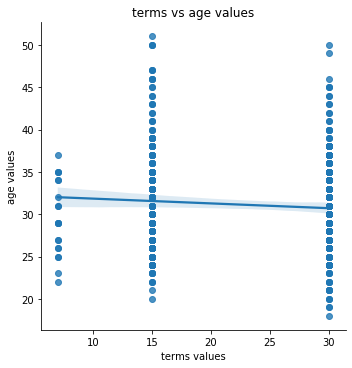

In [95]:
sns.lmplot(x='terms',y='age',data=data)
plt.xlabel('terms values')
plt.ylabel('age values')

plt.title('terms vs age values')

# term에 따른 평균나이??????

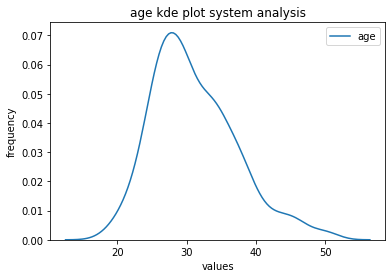

In [96]:
sns.kdeplot(data['age'])
plt.xlabel('values')
plt.ylabel('frequency')
plt.title('age kde plot system analysis')
plt.show()


#나이 빈도

Text(0, 0.5, 'frequency')

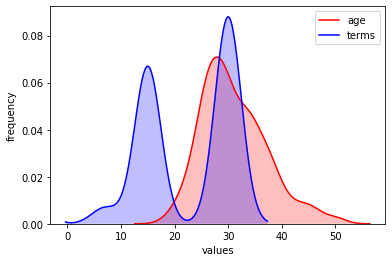

In [100]:
sns.kdeplot(data['age'],shade=True,color='r')
sns.kdeplot(data['terms'],shade= True,color='b')

plt.xlabel('values')
plt.ylabel('frequency')

## gender

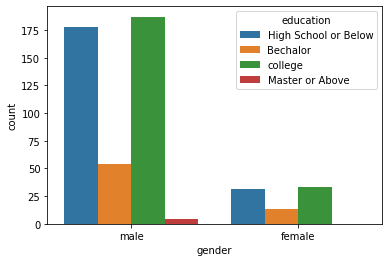

In [101]:
# 성별별 학력
sns.countplot(data['gender'],hue=data['education'])

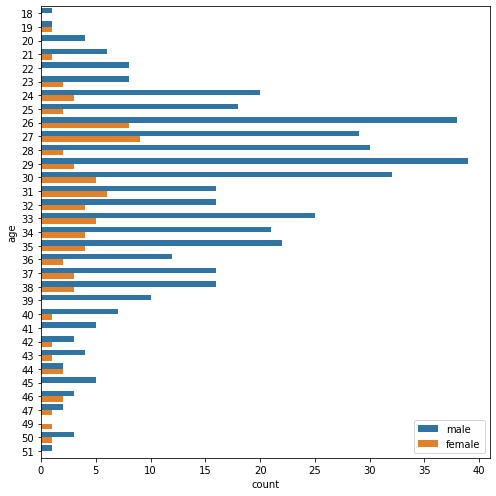

In [102]:
plt.figure(figsize=(7,7))
sns.countplot(y=data['age'],hue=data['gender'])
plt.legend(loc=4)
plt.tight_layout()
plt.show()

# data_new

In [3]:
data_new = data[['loan_status','terms','age','education','gender']]

In [5]:
data_new

,loan_status,terms,age,education,gender
0,PAIDOFF,30,45,High School or Below,male
1,PAIDOFF,30,50,Bechalor,female
2,PAIDOFF,30,33,Bechalor,female
3,PAIDOFF,15,27,college,male
4,PAIDOFF,30,28,college,female
...,...,...,...,...,...
495,COLLECTION_PAIDOFF,30,28,High School or Below,male
496,COLLECTION_PAIDOFF,15,26,High School or Below,male
497,COLLECTION_PAIDOFF,15,30,college,male
498,COLLECTION_PAIDOFF,30,38,college,female


In [12]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data_new_loan_status = le.fit_transform(data_new['loan_status'])
data_new_loan_status = pd.Series(data_new_loan_status)
data_new_loan_status = pd.DataFrame(data_new_loan_status,columns=['loan_status'])

In [14]:
data_new_gender = le.fit_transform(data_new['gender'])
data_new_gender = pd.Series(data_new_gender)
data_new_gender = pd.DataFrame(data_new_gender,columns=['gender'])

In [16]:
data_new_education = le.fit_transform(data_new['education'])
data_new_education = pd.Series(data_new_education)
data_new_education = pd.DataFrame(data_new_education,columns=['education'])

In [17]:
data_new

,loan_status,terms,age,education,gender
0,PAIDOFF,30,45,High School or Below,male
1,PAIDOFF,30,50,Bechalor,female
2,PAIDOFF,30,33,Bechalor,female
3,PAIDOFF,15,27,college,male
4,PAIDOFF,30,28,college,female
...,...,...,...,...,...
495,COLLECTION_PAIDOFF,30,28,High School or Below,male
496,COLLECTION_PAIDOFF,15,26,High School or Below,male
497,COLLECTION_PAIDOFF,15,30,college,male
498,COLLECTION_PAIDOFF,30,38,college,female


In [19]:
data_new=data_new.drop(['loan_status','education','gender'],axis=1)
data_new=pd.concat([data_new,data_new_loan_status],axis=1) 
data_new=pd.concat([data_new,data_new_education],axis=1) 
data_new=pd.concat([data_new,data_new_gender],axis=1) 
data_new=data_new.drop(['loan_status'],axis=1)

In [20]:
data_new

,terms,age,education,gender
0,30,45,1,1
1,30,50,0,0
2,30,33,0,0
3,15,27,3,1
4,30,28,3,0
...,...,...,...,...
495,30,28,1,1
496,15,26,1,1
497,15,30,3,1
498,30,38,3,0


## modeling

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier



In [32]:
data_new

,terms,age,education,gender
0,30,45,1,1
1,30,50,0,0
2,30,33,0,0
3,15,27,3,1
4,30,28,3,0
...,...,...,...,...
495,30,28,1,1
496,15,26,1,1
497,15,30,3,1
498,30,38,3,0


In [34]:
# x 와 y
x_train,x_test,y_train,y_test = train_test_split(data_new,data_new_loan_status,
                                               test_size = 0.33,random_state =0)

In [42]:
lrr =LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
cm =confusion_matrix(y_pred,y_test) #평가지표  #예측한것과 실제값 ??

print(cm)

[[ 0  0  0]
 [ 0  0  0]
 [34 33 98]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
print('train :',lrr.score(x_train,y_train))
print('test : ', lrr.score(x_test,y_test))


train : 0.6029850746268657
test :  0.593939393939394


In [62]:
lr = LinearRegression(n_jobs=3)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test).astype(int)


In [64]:
print('train :',lr.score(x_train,y_train))
print('test :',lr.score(x_test,y_test))


train : 0.028932032126486762
test : -0.015285803143515462


In [67]:
svc=SVC(random_state=0,kernel='rbf') 
svc.fit(x_train,y_train)

y_pred=lr.predict(x_test).astype(int)
print('train :',svc.score(x_train,y_train))
print('test :',svc.score(x_test,y_test))
# print("SVC Train Accuracy :{:2f}".format(round(svc.score(x_train,y_train)100,2)))

train : 0.6029850746268657
test : 0.593939393939394


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
lsvc = LinearSVC(random_state=0)
lsvc.fit(x_train,y_train)

y_pred = lsvc.predict(x_test).astype(int)

print("train :",lsvc.score(x_train,y_train))
print("test :" ,lsvc.score(x_test,y_test))

train : 0.20597014925373133
test : 0.20606060606060606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
